<a href="https://colab.research.google.com/github/simecek/dspracticum2021/blob/main/lesson03/mnist_fashion_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.0


## Data

In [2]:
# load Fashion MNIST from Keras repo
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# add extra dimension (to have one channel)
x_train = x_train[:,:,:,None]
x_test = x_test[:,:,:,None]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [3]:
clothes_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Plotting

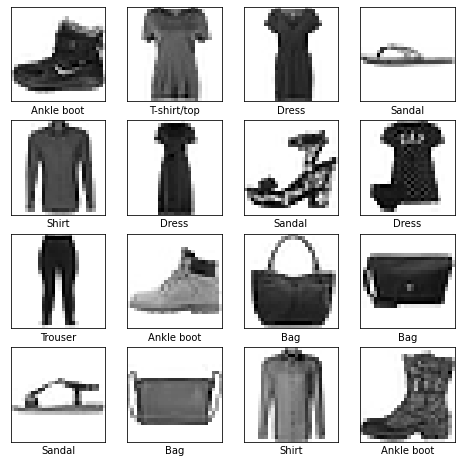

In [4]:
def plot_image(x, title = ""):
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x, cmap=plt.cm.binary)
  plt.xlabel(title)

plt.figure(figsize=(8,8))
for i in range(0, 160, 10):
  plt.subplot(4, 4, i // 10 + 1)
  plot_image(x_train[i].squeeze(), clothes_labels[y_train[i]])


## Dense Neural Network

In [5]:
# Normalize values from [0, 255] to [0, 1] interval
x_train = x_train / 255
x_test = x_test / 255

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

y_train.shape

(60000, 10)

In [7]:
dnn_model = keras.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

dnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = dnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 4s 5ms/step - loss: 0.6037 - accuracy: 0.7919 - val_loss: 0.4681 - val_accuracy: 0.8324
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4165 - accuracy: 0.8529 - val_loss: 0.4082 - val_accuracy: 0.8549
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3690 - accuracy: 0.8674 - val_loss: 0.4165 - val_accuracy: 0.8490
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3492 - accuracy: 0.8755 - val_loss: 0.3887 - val_accuracy: 0.8599
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3242 - accuracy: 0.8838 - val_loss: 0.3764 - val_accuracy: 0.8648
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3087 - accuracy: 0.8874 - val_loss: 0.3614 - val_accuracy: 0.8724
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.2952 - accuracy: 0.8928 - val_loss: 0.3454 - val_accuracy: 0.8745
Epoch 

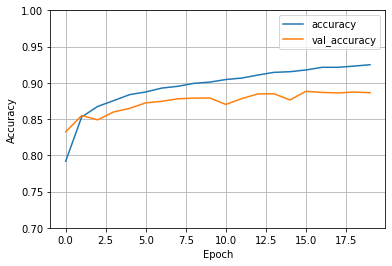

In [9]:
def plot_loss(history, ylim=(0,1)):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

plot_loss(history, ylim=(0.7, 1))

## Convolutional Neural Network

In [10]:
cnn_model = keras.Sequential([
      layers.Conv2D(input_shape=(28,28,1), filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Dropout(0.5),
      layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [11]:
history = cnn_model.fit(
  x_train, y_train,
  batch_size = 256,
  epochs = 20,
  validation_data = (x_test, y_test),
  verbose = 1
)

Epoch 1/20
235/235 [==============================] - 35s 26ms/step - loss: 0.6190 - accuracy: 0.7817 - val_loss: 0.3890 - val_accuracy: 0.8595
Epoch 2/20
235/235 [==============================] - 5s 23ms/step - loss: 0.4039 - accuracy: 0.8554 - val_loss: 0.3333 - val_accuracy: 0.8792
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3484 - accuracy: 0.8756 - val_loss: 0.2994 - val_accuracy: 0.8916
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3100 - accuracy: 0.8862 - val_loss: 0.2930 - val_accuracy: 0.8923
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2849 - accuracy: 0.8958 - val_loss: 0.2625 - val_accuracy: 0.9043
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2638 - accuracy: 0.9032 - val_loss: 0.2630 - val_accuracy: 0.9039
Epoch 7/20
235/235 [==============================] - 5s 23ms/step - loss: 0.2461 - accuracy: 0.9086 - val_loss: 0.2532 - val_accuracy: 0.908

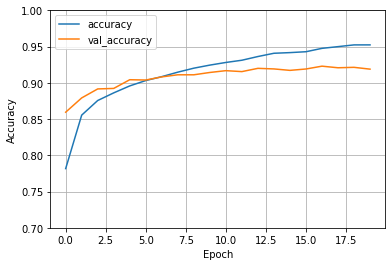

In [12]:
plot_loss(history, ylim=(0.7, 1))